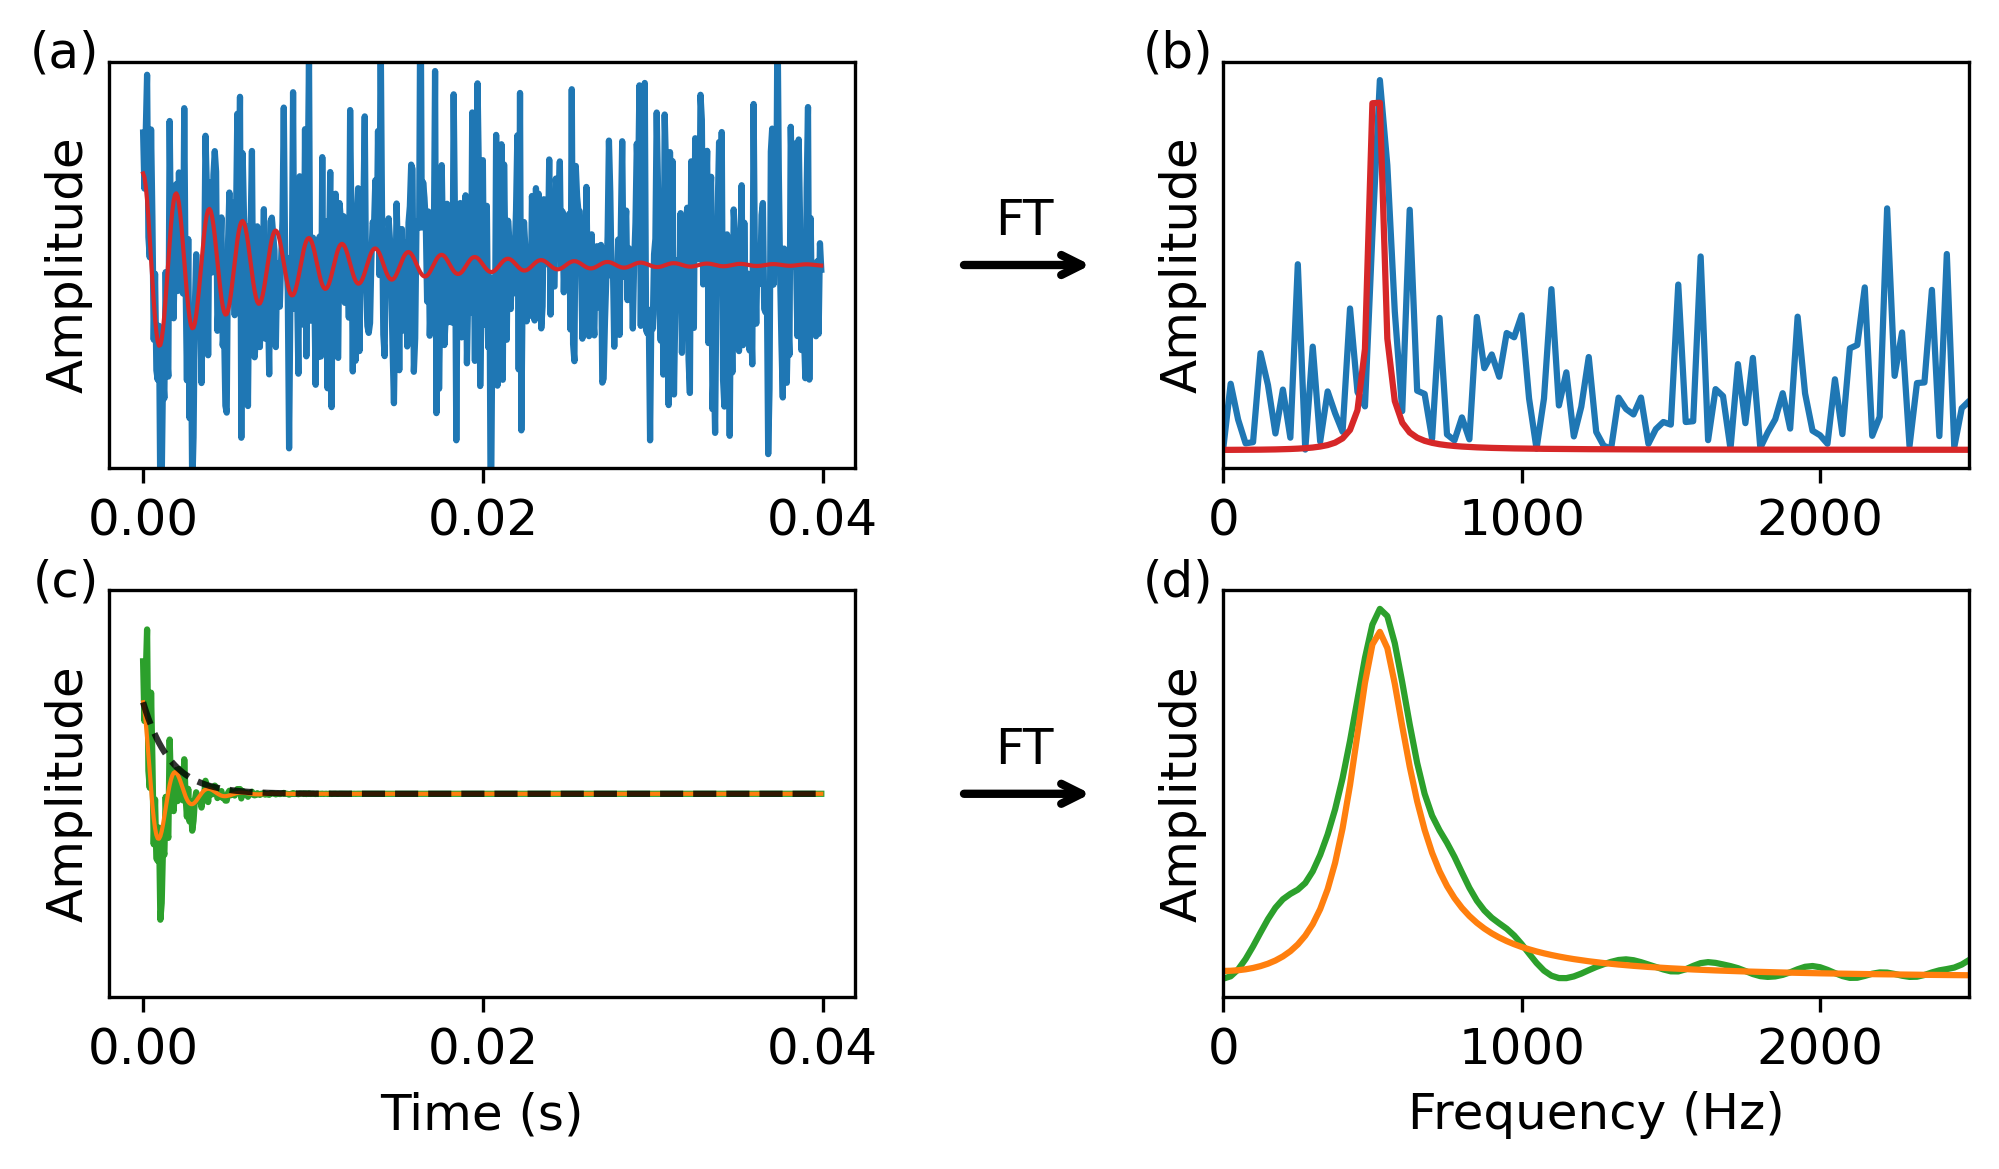

In [70]:
# plot for the sampling section
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

# Time-domain parameters
DW = 1 / 800 / 16  # dwell time
SI = 256 * 2  # size i.e. number of sampled points
timeStamp = DW * np.arange(SI)
T2 = DW*SI*0.2
initial_phase = 0*np.pi / 4
envelope = np.exp(-timeStamp / T2)
nu_Larmor = SI * 1
s_t_smooth = envelope * (
    np.cos(2 * np.pi * nu_Larmor * timeStamp + initial_phase)
    + 1j * 0 * np.sin(2 * np.pi * nu_Larmor * timeStamp + initial_phase)
)
# Set the seed
np.random.seed(42)

noise = np.random.normal(0, 1, SI) + 1j * 0 * np.random.normal(0, 1, SI)
s_t_noisy = s_t_smooth + 0.9 * noise


# window_func = envelope
window_func = np.exp(-timeStamp / (T2 * 0.2))
s_t_smooth_win = s_t_smooth * window_func
s_t_noisy_win = s_t_noisy * window_func


# Compute FFT
fft_sig_smooth = np.fft.fft(s_t_smooth)
fft_sig_smooth_sq = np.abs(fft_sig_smooth) ** 2

fft_sig_smooth_win = np.fft.fft(s_t_smooth_win)
fft_sig_smooth_win_sq = np.abs(fft_sig_smooth_win) ** 2

fft_sig_noisy = np.fft.fft(s_t_noisy)
fft_sig_noisy_sq = np.abs(fft_sig_noisy) ** 2


fft_sig_expo = np.fft.fft(s_t_noisy_win)
fft_sig_expo_sq = np.abs(fft_sig_expo) ** 2

freqs = np.fft.fftfreq(SI, DW)

fft_sig_smooth_sq = fft_sig_smooth_sq[np.argsort(freqs)]
fft_sig_smooth_win_sq = fft_sig_smooth_win_sq[np.argsort(freqs)]
fft_sig_noisy_sq = fft_sig_noisy_sq[np.argsort(freqs)]
fft_sig_expo_sq = fft_sig_expo_sq[np.argsort(freqs)]

freqs = np.sort(freqs)


# Plotting setup
fontsize=12
plt.rc("font", size=fontsize)  # font size for all figures
plt.rc("figure", titlesize=fontsize)  # Figure title
plt.rc("axes", titlesize=fontsize)  # Axes title

nrows, ncols = (2, 3)
fig = plt.figure(figsize=(8, 4.5*0.9), dpi=300)  # initialize a figure
gs = gridspec.GridSpec(
    nrows=nrows, ncols=ncols, width_ratios=[1, 0.2, 1], height_ratios=[1, 1]
)  # create grid for multiple figures

# fix the margins
wspace = 0.2
hspace = 0.3
fig.subplots_adjust(wspace=wspace, hspace=hspace)
axs = []
for i in range(nrows):
    axs.append([])
    for j in range(ncols):
        axs[-1].append(fig.add_subplot(gs[i, j]))
axs = np.array(axs)

# --- Middle right plots: Arrow with transform labels ---
mid_right_ind = 1
for i, ax in enumerate(
    axs[:, mid_right_ind]
):
    ax.axis("off")
    # Fourier transform
    ax.text(0.4, 0.55, "FT", ha="center", va="bottom")
    ax.annotate(
        "", xy=(0.9, 0.5), xytext=(-0.06, 0.5), arrowprops=dict(arrowstyle="->", lw=2)
    )

# --- left right plots: time domain ---

axs[0, 0].plot(timeStamp, s_t_noisy.real, color="tab:blue")
axs[0, 0].plot(
    timeStamp, s_t_smooth.real, color="tab:red", linestyle="-", zorder=10, alpha=1, lw=1
)

axs[1, 0].plot(timeStamp, window_func, color="k", linestyle="--", zorder=10,alpha=0.8)
axs[1, 0].plot(timeStamp, s_t_noisy_win.real, color="tab:green",alpha=1)
# axs[1, 0].plot(timeStamp, s_t_noisy.imag, color="tab:green")
axs[1, 0].plot(
    timeStamp, s_t_smooth_win.real, color="tab:orange", linestyle="-", zorder=9, alpha=1,lw=1
)


axs[-1, 0].set_xlabel("Time (s)")


# --- right right plots: frequency-domain ---

ax = axs[0, 2]
ax.plot(freqs, fft_sig_noisy_sq, color="tab:blue")
ax.plot(freqs, fft_sig_smooth_sq*1.3, color="tab:red")

ax = axs[1, 2]
ax.plot(freqs, fft_sig_expo_sq, color="tab:green")
ax.plot(freqs, fft_sig_smooth_win_sq * 2, color="tab:orange")
for i, ax in enumerate(list(axs[:, 2])):
    ax.set_yticks([])
    ax.set_xlim(0, 2500)
    ax.set_ylabel("Amplitude")


ylim0, ylim1 = axs[0, 0].get_ylim()
ylim2, ylim3 = axs[1, 0].get_ylim()
ylim_abs_max = 0.6*np.amax(np.abs([ylim0, ylim1, ylim2, ylim3]))
for i, ax in enumerate(list(axs[:, 0])):
    ax.set_ylim(-ylim_abs_max, ylim_abs_max)
    ax.set_yticks([])
    ax.set_ylabel("Amplitude")

axs[-1, -1].set_xlabel("Frequency (Hz)")


for i, ax in enumerate(np.array([axs[0, 0], axs[0, 2], axs[1, 0], axs[1, 2]])):
    # xleft, xright = ax.get_xlim()
    # ybottom, ytop = ax.get_ylim()
    ax.text(
        -0.013,
        0.96,
        s="(" + chr(i + ord("a")) + ")",
        transform=ax.transAxes,
        ha="right",
        va="bottom",
        color="k",
    )